In [1]:
import pandas as pd
df = pd.read_csv('../Dataset/archive/kannada.csv')
df.head(2)

,img,class
0,Img/img001-001.png,1
1,Img/img001-002.png,1


In [2]:
# Changing class range from 0 to 654.
df['class'] = df['class'] - 1 

In [3]:
# Dataset Size
df.shape

(16375, 2)

In [4]:
# Total Numbers of Output Classes
len(df['class'].unique())

655

In [5]:
# Total Number of Images Per Class
df['class'].value_counts()

class
654    25
0      25
1      25
2      25
3      25
       ..
19     25
18     25
17     25
16     25
15     25
Name: count, Length: 655, dtype: int64

## Preprocessing the images

In [6]:
import numpy as np
import cv2
import os
def load_and_preprocess_images(img_dir, image_paths, labels):
    """Used to preprocess the image such as grayscale convertion, resizing, normalization etc."""
    images = []
    class_labels = []
    full_paths = [os.path.join(img_dir, img_path) for img_path in image_paths]
    for index in range(len(full_paths)):
        img = cv2.imread(full_paths[index], cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64)) 
            img = img / 255.0
            images.append(img)
            class_labels.append(labels[index])
    return np.array(images), np.array(class_labels)
img_dir = '../Dataset/archive/'
image_paths = df["img"].values
labels = df["class"].values
X, y = load_and_preprocess_images(img_dir, image_paths, labels)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [8]:
X_train

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [9]:
y_train, len(y_train)

(array([271, 551,   3, ..., 461,  67, 240]), 13026)

In [10]:
X_test

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [11]:
y_test, len(y_test)

(array([553, 403,  80, ..., 278, 479, 111]), 3257)

In [12]:
# Reshaping the data to fit the CNN Model.
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

## CNN Implementation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
model = Sequential([
    # Convolution Layers.
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,1)),  
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),  
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu', padding='same'),  
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    # Flatten Layer.
    Flatten(),

    # Hidden Layers.
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    # Output Layer.
    Dense(655, activation='softmax')
])
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\ranuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 655)                 │         168,335 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,360,335 (9.00 MB)

 Trainable params: 2,359,375 (9.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [16]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
datagen.fit(X_train)

In [17]:
# Train the CNN Model.
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_test, y_test), callbacks=[early_stop, reduce_lr])

C:\Users\ranuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 138s 309ms/step - accuracy: 0.0051 - loss: 6.5671 - val_accuracy: 0.0018 - val_loss: 8.1984 - learning_rate: 0.0010
Epoch 2/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 132s 322ms/step - accuracy: 0.0182 - loss: 5.7609 - val_accuracy: 0.0485 - val_loss: 4.9836 - learning_rate: 0.0010
Epoch 3/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 127s 309ms/step - accuracy: 0.0783 - loss: 4.7445 - val_accuracy: 0.2545 - val_loss: 3.2990 - learning_rate: 0.0010
Epoch 4/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 124s 304ms/step - accuracy: 0.2372 - loss: 3.3758 - val_accuracy: 0.3669 - val_loss: 2.7845 - learning_rate: 0.0010
Epoch 5/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 145s 311ms/step - accuracy: 0.4080 - loss: 2.3427 - val_accuracy: 0.3909 - val_loss: 2.2425 - learning_rate: 0.0010
Epoch 6/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - accuracy: 0.5331 - loss: 1.7359 - val_accuracy: 0.6574 - val_loss: 1.3202 - learning_rate: 0.0010
Epoch 7/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 125s 307ms/step - accura

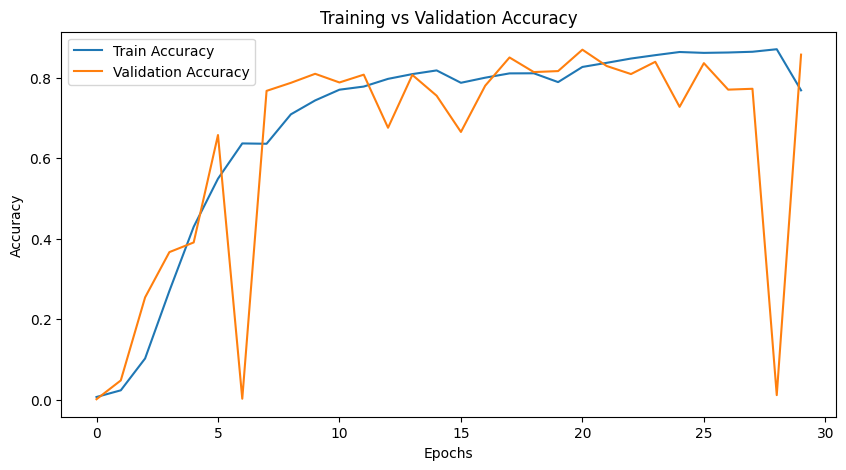

In [18]:
# Model Training Progress
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score
cnn_accuracy = accuracy_score(y_pred_classes, y_test)
print(cnn_accuracy)

102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step
0.869204789683758


In [20]:
model.save('cnn.h5')

## Feature Extraction

In [21]:
from tensorflow.keras.models import Model
feature_extractor = Model(inputs=model.inputs, outputs=model.get_layer(index=9).output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

C:\Users\ranuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 64, 64, 1))
  warnings.warn(msg)


407/408 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

C:\Users\ranuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 64, 64, 1))
  warnings.warn(msg)


408/408 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step


## KNN Implementation

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train_features, y_train)
y_pred_knn = knn.predict(X_test_features)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.16610377648142463


## SVM Implementation

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.5701565858151674


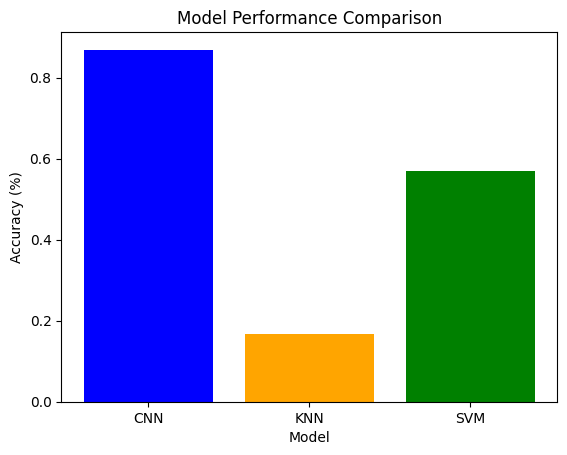

In [25]:
# Model Comparison.
import matplotlib.pyplot as plt
models = ['CNN', 'KNN', 'SVM']
accuracy = [cnn_accuracy, accuracy_knn, accuracy_svm]
plt.bar(models, accuracy, color=['blue', 'orange', 'green'])
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Comparison")
plt.show()

In [30]:
# Confusion Matrix.
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[1 1 0 ... 0 0 0]
 [1 5 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 8]]


In [31]:
report = classification_report(y_test, y_pred_classes)
print(report)

C:\Users\ranuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ranuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.83      0.83      0.83         6
           2       0.80      0.67      0.73         6
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       0.80      0.80      0.80         5
           7       1.00      0.88      0.93         8
           8       1.00      0.71      0.83         7
           9       0.71      0.83      0.77         6
          10       1.00      1.00      1.00         4
          11       1.00      0.40      0.57         5
          12       1.00      1.00      1.00         2
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         4
          16       0.50      0.50      0.50         2
          17       1.00    

C:\Users\ranuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
